In [4]:
from question_generater import QuestionGenerator


In [5]:
qg_600 = QuestionGenerator(dataset='600',question_threshold=60)
qg_150 = QuestionGenerator(dataset='150',question_threshold=15)

In [6]:
import json
import random


for i in range(120):
    user_id = str(i)
    # generate a list of 60 1s and 15 0s to decide when to use two question generator
    # 1 means use two question generator
    # 0 means use one question generator
    random_list = [1]*120 + [0]*30
    # shuffle the list
    random.shuffle(random_list)
    # output txt containing chinese
    with open('data/questions/preset/{}.txt'.format(user_id), 'w',encoding='utf-8') as f:
        for i in range(150):
            if random_list[i] == 1:
                question = qg_600.get_question(user_id)
            else: 
                question = qg_150.get_question(user_id)
            #save to file, each question is a json, so save it in a line and can be parsed into json when read in the line
            if question["type"]!="finished":
                f.write(json.dumps(question, ensure_ascii=False)+"\n")
        f.write(json.dumps({"type":"finished"}, ensure_ascii=False)+"\n")

In [9]:
# read in the 100 question files from selected directory
import os
import json

all_question_list = []


for filename in os.listdir("data/questions/preset/"):
    if filename.endswith(".txt"):
        with open("data/questions/preset/" + filename, "r") as f:
            for line in f:
                all_question_list.append(json.loads(line))
print(len(all_question_list))

18060


In [10]:
# read in tagged file
import pandas as pd
df = pd.read_csv("src/instances_Inception_600_with_tag.csv")

150 question number: 2054
600 question number: 7200
example expression number: 750
instance expression number: 750


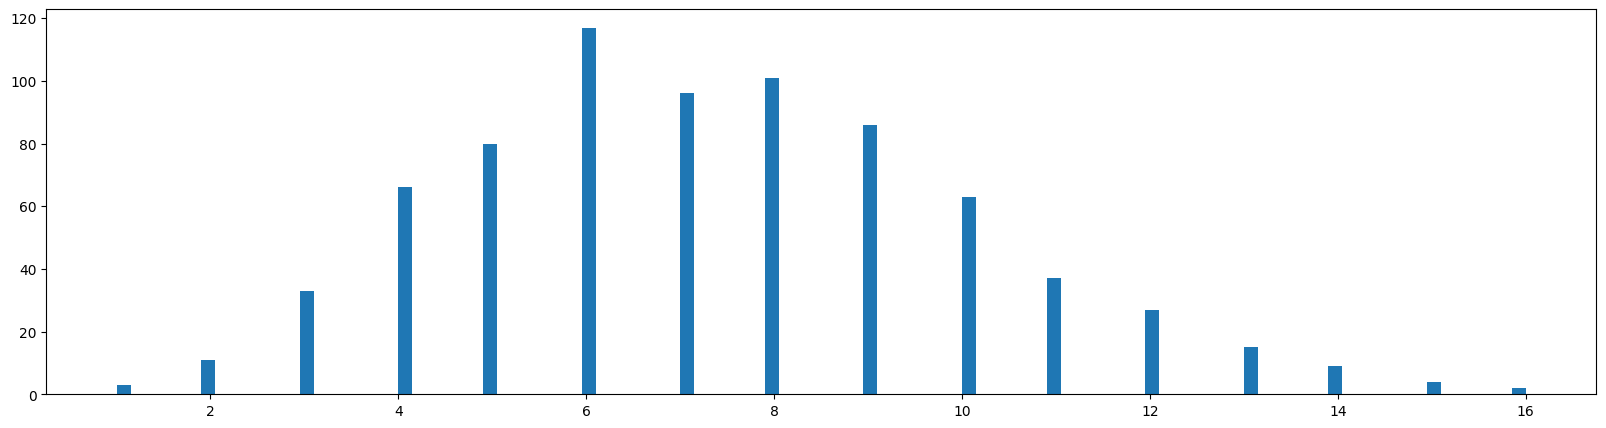

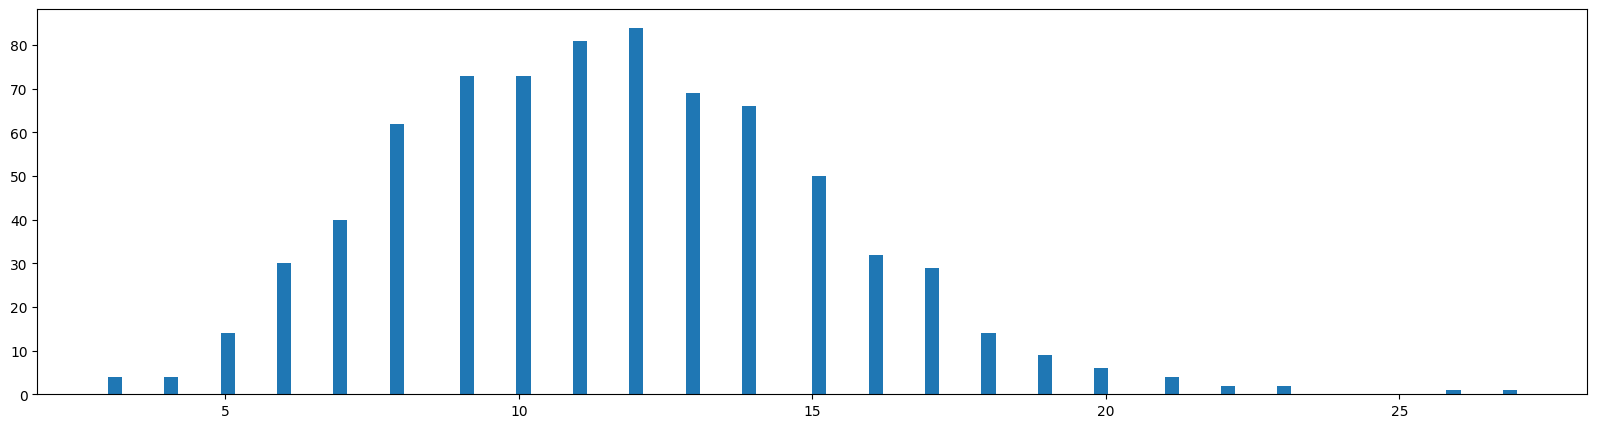

In [13]:
# statistics on the appearance time of each expression in the all quesion list
example_times = {}
instance_times = {}
q150_times = 0
q600_times = 0
for question in all_question_list:
    if question["type"] == "finished":
        continue
    if question["type"] == "1v1":
        if question["dataset"]=="150":
            q150_times += 1
        else:
            q600_times += 1
        example_instance = question["example_instance"]
        if example_instance not in example_times:
            example_times[example_instance] = 0
        example_times[example_instance] += 1
    elif question["type"] == "1":
        instance = question["instance"]
        if instance not in instance_times:
            instance_times[instance] = 0
        instance_times[instance] += 1
    else:
        if question["dataset"]=="150":
            q150_times += 1
        else:
            q600_times += 1
        '''
        example_instances = question["example_instances"]
        for example_instance in example_instances:
            if example_instance not in example_times:
                example_times[example_instance] = 0
            example_times[example_instance] += 1
        '''
print(f"150 question number: {q150_times}")
print(f"600 question number: {q600_times}")
print(f"example expression number: {len(example_times)}")
print(f"instance expression number: {len(instance_times)}")

import matplotlib.pyplot as plt
# use a histogram to show the distribution of the appearance time of each expression
plt.figure(figsize=(20, 5))
plt.hist(list(example_times.values()), bins=100)
plt.show()
plt.figure(figsize=(20, 5))
plt.hist(list(instance_times.values()), bins=100)
plt.show()
